In [217]:
# This example imports functions from the DemoReadSGLXData module to read
# analog data and convert it to volts based on the metadata information.
# The metadata file must be present in the same directory as the binary file.
# Works with both imec and nidq analog channels.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tkinter import Tk
from tkinter import filedialog
import pandas as pd
from DemoReadSGLXData.readSGLX import readMeta, SampRate, makeMemMapRaw, GainCorrectIM, GainCorrectNI


##  MUST MODIFTIED BEFROE RUNNING
mice = '20230113_littermate'
region = 'Parvicellular reticular nucleus'
# Lobules IV-V  Lobule III  Lobule II Medial vestibular nucleus  Inferior colliculus external nucleus  Lobule II   Intermediate reticular nucleus  Pontine reticular nucleus caudal part
# Parvicellular reticular nucleus  Parabrachial nucleus  Cerebellum  Vestibulocerebellar nucleus  Superior vestibular nucleus Subceruleus nucleus  Pons  
tStart = 0        # in seconds
tEnd = 3023.3104238336464     # find it in the metadata file

region_ch = pd.read_csv(rf"E:\xinchao\Data\useful_data\NP1\{mice}\LFP\region_ch_match_sort_exclude_abnor_ch\region_channel_exclude_abnormal_ch.csv",index_col=0)

In [218]:
# Get bin file from user
root = Tk()         # create the Tkinter widget
root.withdraw()     # hide the Tkinter root window

# Windows specific; forces the window to appear in front
root.attributes("-topmost", True)

binFullPath = Path(filedialog.askopenfilename(title="Select binary file"))

root.destroy()

In [219]:
# list of channels to extract, by index in saved file
chanList = region_ch[region].dropna().astype(int).tolist()  # Extract the channel numbers for the specified region
chanList = [ch - 384 for ch in chanList]

In [220]:
meta = readMeta(binFullPath)
sRate = SampRate(meta)

firstSamp = int(sRate*tStart)
lastSamp = int(sRate*tEnd)
rawData = makeMemMapRaw(binFullPath, meta)
selectData = rawData[chanList, firstSamp:lastSamp+1]


if meta['typeThis'] == 'imec':
    # apply gain correction and convert to uV
    convData = 1e6*GainCorrectIM(selectData, chanList, meta)
else:
    # apply gain correction and convert to mV
    convData = 1e3*GainCorrectNI(selectData, chanList, meta)

nChan: 385, nFileSamp: 7558342


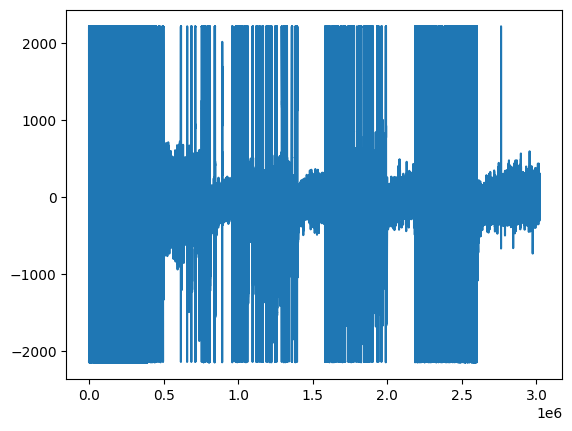

In [221]:
# Plot the first of the extracted channels
tDat = np.arange(firstSamp, lastSamp, dtype='uint64')
tDat = 1000*tDat/sRate      # plot time axis in msec
fig, ax = plt.subplots()
ax.plot(tDat, convData[0, :])
plt.show()


In [222]:
np.save(binFullPath.with_suffix('.npy'), convData)  #跑完后需自行修改文件名为对应区域名字